<a href="https://colab.research.google.com/github/Sanjeevuvs/DATAVisualization/blob/main/20181COM0167_FINAL_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gross enrollment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_ger = pd.read_csv('/content/gross-enrollment-ratio-2013-2016.csv')
df_ger.head(10)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.20,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27
3,Assam,2013-14,111.77,115.16,113.43,87.85,98.69,93.13,65.60,77.20,71.21,31.78,34.27,32.94
4,Bihar,2013-14,95.03,101.15,97.96,80.60,94.92,87.24,57.66,62.96,60.08,23.33,24.17,23.7
5,Chandigarh,2013-14,88.42,96.09,91.85,99.93,103.02,101.27,92.08,92.16,92.11,90.5,92.88,91.49
6,Chhattisgarh,2013-14,104.06,103.93,103.99,100.35,101.10,100.72,96.68,99.32,97.99,58.27,56.16,57.23
7,Dadra & Nagar Haveli,2013-14,89.50,81.89,85.78,100.76,91.43,96.22,87.79,79.08,83.66,37.77,41.99,39.64
8,Daman & Diu,2013-14,87.80,89.78,88.69,84.06,90.61,86.97,67.94,82.20,73.88,34.37,64.55,44.36
9,Delhi,2013-14,108.78,112.95,110.67,117.76,129.50,122.91,102.02,102.86,102.40,98.88,102.3,100.42


In [ ]:
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                110 non-null    object 
 1   Year                    110 non-null    object 
 2   Primary_Boys            110 non-null    float64
 3   Primary_Girls           110 non-null    float64
 4   Primary_Total           110 non-null    float64
 5   Upper_Primary_Boys      110 non-null    float64
 6   Upper_Primary_Girls     110 non-null    float64
 7   Upper_Primary_Total     110 non-null    float64
 8   Secondary_Boys          110 non-null    float64
 9   Secondary_Girls         110 non-null    float64
 10  Secondary_Total         110 non-null    float64
 11  Higher_Secondary_Boys   110 non-null    object 
 12  Higher_Secondary_Girls  110 non-null    object 
 13  Higher_Secondary_Total  110 non-null    object 
dtypes: float64(9), object(5)
memory usage: 12.

In [ ]:
# Arrange the `year` column in ascending order
df_ger = df_ger.sort_values('Year',ascending=True)

# Dataframe for `All India` Gross Enrollment Ratio
ger_ai = df_ger[df_ger['State_UT'] == 'All India'].reset_index(drop=True)

In [ ]:
print("Gross Enrollment Ratio - All India (2013-2016)")
display(ger_ai)

Gross Enrollment Ratio - All India (2013-2016)


,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,All India,2013-14,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,76.64,52.77,51.58,52.21
1,All India,2014-15,98.85,101.43,100.08,87.71,95.29,91.24,78.13,78.94,78.51,54.57,53.81,54.21
2,All India,2015-16,97.87,100.69,99.21,88.72,97.57,92.81,79.16,80.97,80.01,55.95,56.41,56.16


In [ ]:
def drop_rows(dataframe,given_list,search_value):
  for i in given_list:
      dataframe = dataframe[~dataframe[i].str.contains(search_value)].reset_index(drop=True)
  return dataframe


ger_column_list = ['Higher_Secondary_Boys','Higher_Secondary_Girls','Higher_Secondary_Total']
df_ger = drop_rows(df_ger,ger_column_list,'NR')
df_ger = drop_rows(df_ger,ger_column_list,'@')


In [ ]:
def convert_to_float(dataframe,given_list,which_type):
  for i in given_list:
    dataframe[i] = dataframe[i].astype(which_type)
  return dataframe

In [ ]:
ger_girls_list = ['State_UT','Year','Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']
ger_boys_list = ['State_UT','Year','Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']

ger_girls = ger_ai.loc[:,ger_girls_list]
ger_boys = ger_ai.loc[:,ger_boys_list]

tidy_girls = pd.melt(ger_girls,id_vars=['Year','State_UT']).rename(columns=str.title)
tidy_boys = pd.melt(ger_boys,id_vars=['Year','State_UT']).rename(columns=str.title)
tidy_girls=convert_to_float(tidy_girls,['Value'],float)
tidy_boys=convert_to_float(tidy_boys,['Value'],float)

In [ ]:
df_ger = convert_to_float(df_ger,ger_column_list,float)
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                108 non-null    object 
 1   Year                    108 non-null    object 
 2   Primary_Boys            108 non-null    float64
 3   Primary_Girls           108 non-null    float64
 4   Primary_Total           108 non-null    float64
 5   Upper_Primary_Boys      108 non-null    float64
 6   Upper_Primary_Girls     108 non-null    float64
 7   Upper_Primary_Total     108 non-null    float64
 8   Secondary_Boys          108 non-null    float64
 9   Secondary_Girls         108 non-null    float64
 10  Secondary_Total         108 non-null    float64
 11  Higher_Secondary_Boys   108 non-null    float64
 12  Higher_Secondary_Girls  108 non-null    float64
 13  Higher_Secondary_Total  108 non-null    float64
dtypes: float64(12), object(2)
memory usage: 11

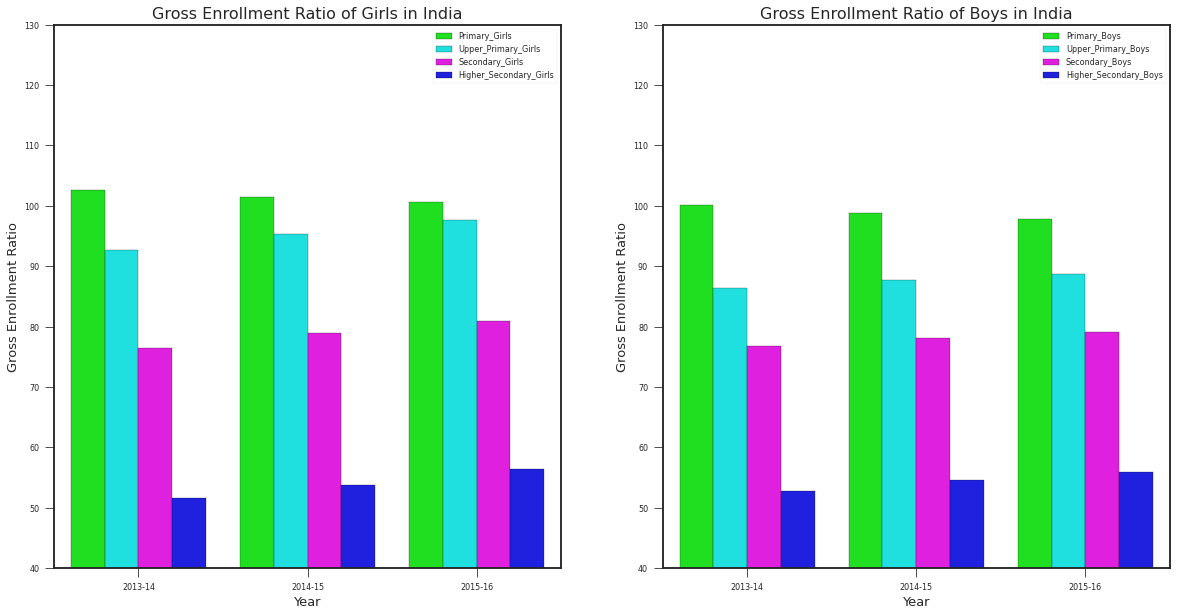

In [ ]:
# setting the plot styles and backgrounds
sns.set(style="ticks",context="talk")
plt.style.use('seaborn-paper')

f, axes = plt.subplots(1, 2, figsize=(20, 10))

colors=['lime','cyan','magenta','blue']


ger_girls_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_girls,edgecolor='black',palette=colors,ax=axes[0])
ger_girls_bplot.set(ylim=(40, 130))

axes[0].set_title('Gross Enrollment Ratio of Girls in India',size = 16)
axes[0].set_ylabel('Gross Enrollment Ratio',size=13)
axes[0].set_xlabel('Year',size=13)
ger_girls_bplot.legend()





ger_boys_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_boys,palette=colors,edgecolor='black',ax=axes[1])
ger_boys_bplot.set(ylim=(40, 130))

axes[1].set_title('Gross Enrollment Ratio of Boys in India',size = 16)
axes[1].set_ylabel('Gross Enrollment Ratio',size=13)
axes[1].set_xlabel('Year',size=13)
ger_boys_bplot.legend()



In [ ]:
ger_ai

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,All India,2013-14,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,76.64,52.77,51.58,52.21
1,All India,2014-15,98.85,101.43,100.08,87.71,95.29,91.24,78.13,78.94,78.51,54.57,53.81,54.21
2,All India,2015-16,97.87,100.69,99.21,88.72,97.57,92.81,79.16,80.97,80.01,55.95,56.41,56.16


In [ ]:
ger_ai_total=ger_ai[['State_UT','Year','Primary_Total','Upper_Primary_Total','Secondary_Total','Higher_Secondary_Total'][:]]
ger_ai_total

,State_UT,Year,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
0,All India,2013-14,101.36,89.33,76.64,52.21
1,All India,2014-15,100.08,91.24,78.51,54.21
2,All India,2015-16,99.21,92.81,80.01,56.16


In [ ]:
ger_total_list = ['State_UT','Year','Primary_Total','Upper_Primary_Total','Secondary_Total','Higher_Secondary_Total']

ger_total = ger_ai.loc[:,ger_total_list]
tidy_total = pd.melt(ger_total,id_vars=['Year','State_UT']).rename(columns=str.title)
tidy_total=convert_to_float(tidy_total,['Value'],float)

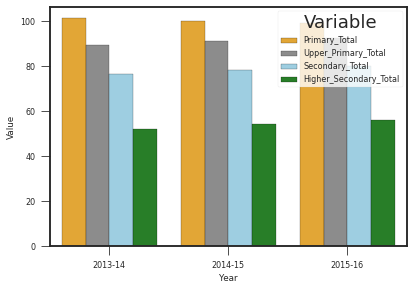

In [ ]:
colors=['orange','grey','skyblue','green']
ger_total_bplot = sns.barplot(x="Year",y='Value',hue='Variable',data=tidy_total,edgecolor='black',palette=colors,alpha=0.9)


<br>
<br>
<br>


